In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.io as pio

pio.templates.default = "plotly_white"

In [68]:
from libs.transformer_utils import encode_labels

## 1. Loading the Dataset

In [69]:
df = pd.read_csv('../data/outputs/06_final_dataset.csv')
df_drivers = pd.read_csv('../data/inputs/drivers.csv')

In [70]:
print(df.shape)
df.head()

(26080, 27)


,resultId,raceId,driverId,constructorId,grid,race_rank,statusId,year,round,circuitId,...,race_end_bf_2019,race_end_in_2019,race_end_in_2020,race_end_in_2021,race_end_in_2022,race_end_in_2023,driver_most_won_circuit_id,driver_nber_of_races_won,driver_nber_of_times_in_top_10,season_age
0,1,18,1,1,1,1,1,2008,1,1,...,193,21,16,21,19,12,9,103,283,23
1,2,18,2,2,5,2,1,2008,1,1,...,66,0,0,0,0,0,0,0,101,31
2,3,18,3,3,7,3,1,2008,1,1,...,145,0,0,0,0,0,6,23,144,23
3,4,18,4,4,11,4,1,2008,1,1,...,202,0,0,11,12,12,3,32,250,27
4,5,18,5,1,3,5,1,2008,1,1,...,39,0,0,0,0,0,11,1,36,27


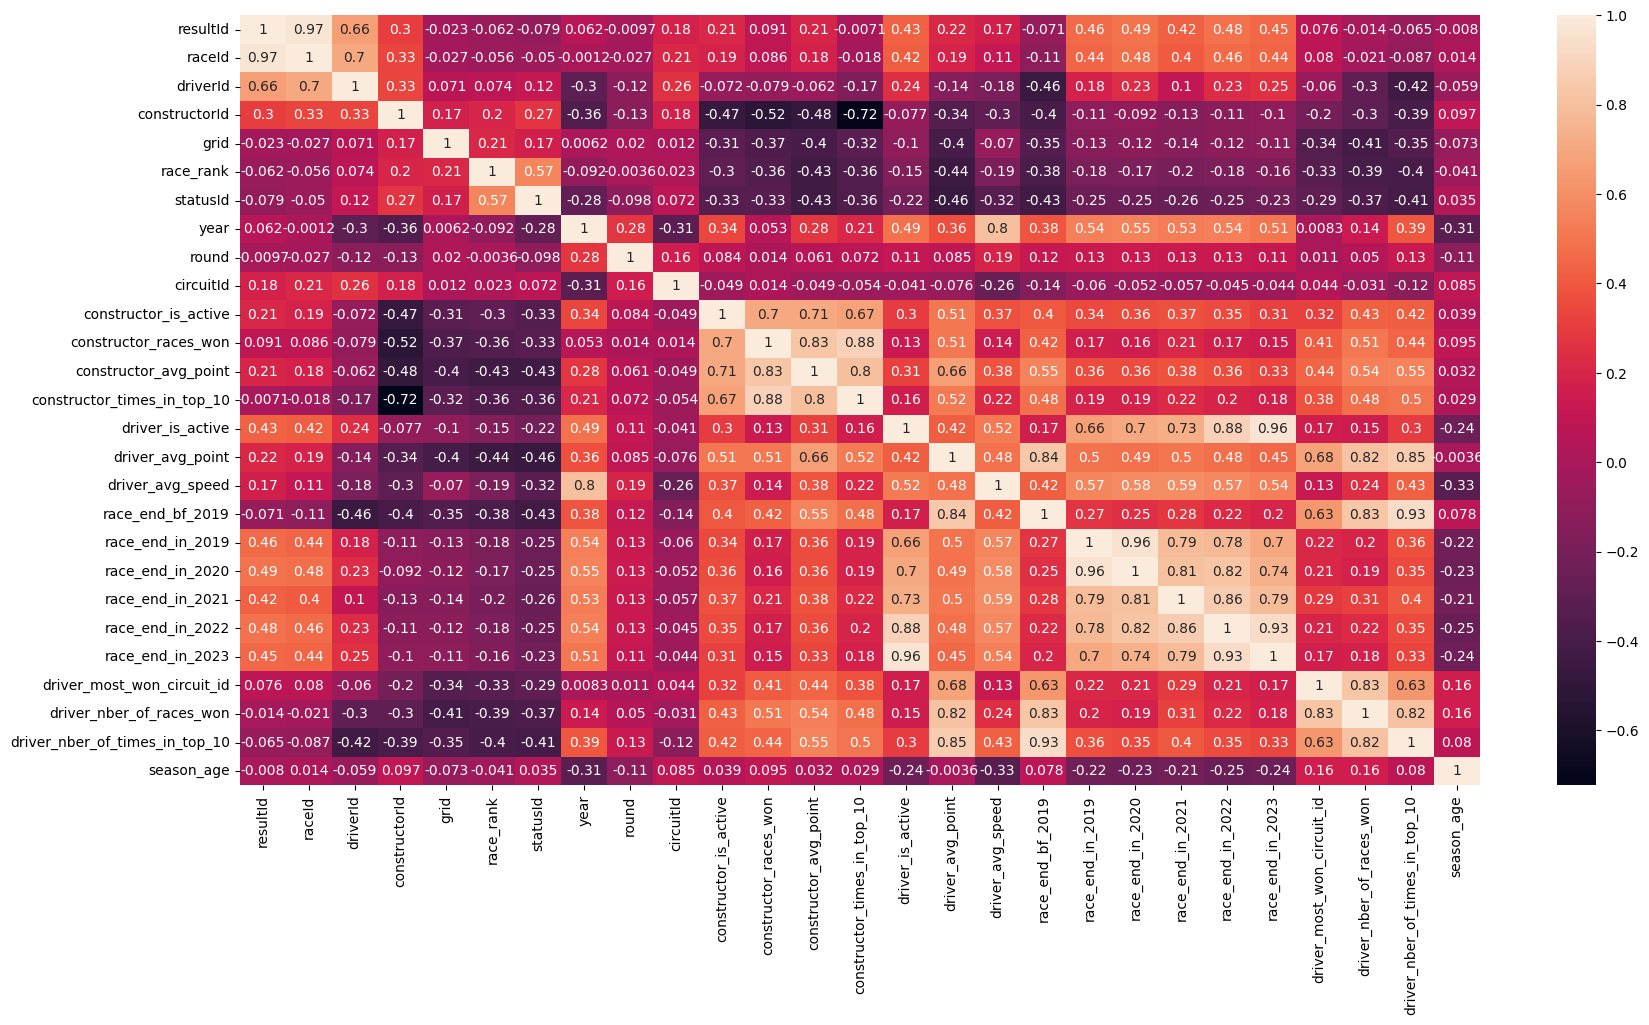

In [71]:
corr_df = df.corr(method='spearman')


plt.figure(figsize=(20, 10))
sns.heatmap(corr_df, annot=True)
plt.show()

In [72]:
# df = encode_labels(df, ['race_rank'])

In [73]:
df = df[df['driver_is_active'] == 1].merge(df_drivers[['driverId', 'forename', 'surname']], how='left', on='driverId')
df['name'] = df['forename'] + ' ' + df['surname']

In [93]:
data = df[df['driver_is_active'] == 1]
fig = px.histogram(data, x='race_rank', color='name', title='Number of Times Each Driver Appears in Each Race Rank', nbins=60, height=700)
fig.update_layout(barmode='stack', xaxis_title='Race Rank', yaxis_title='Count')

/Users/stephcyrille/Projects/Personal/project_ia_f1_gp_predictor/.venv/lib/python3.9/site-packages/plotly/express/_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



In [111]:
px.scatter(data, x='race_rank', y='constructor_is_active', title='', height=700)``